In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/
!cp /content/drive/MyDrive/nlp-final-project/dontpatronizeme_categories.tsv ./
!cp /content/drive/MyDrive/nlp-final-project/dontpatronizeme_pcl.tsv ./
!cp /content/drive/MyDrive/nlp-final-project/README.txt ./

/content


In [ ]:
import random
import os
from urllib import request
import pandas as pd
import numpy as np

In [ ]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


In [ ]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py


In [ ]:
!pwd

/content


In [ ]:
dpm = None

In [ ]:
from dont_patronize_me import DontPatronizeMe
# Initialize a dpm (Don't Patronize Me) object.
# It takes two areguments as input: 
# (1) Path to the directory containing the training set files, which is the root directory of this notebook.
# (2) Path to the test set, which will be released when the evaluation phase begins. In this example, 
# we use the dataset for Subtask 1, which the code will load without labels.
dpm = DontPatronizeMe('.', 'dontpatronizeme_pcl.tsv')

In [ ]:
# This method loads the subtask 1 data
dpm.load_task1()
# which we can then access as a dataframe
task1_df = dpm.train_task1_df

In [ ]:
task1_df['orig_label'].unique()

array(['0', '1', '2', '3', '4'], dtype=object)

In [ ]:
! git clone https://github.com/Perez-AlmendrosC/dontpatronizeme.git

Cloning into 'dontpatronizeme'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 200 (delta 87), reused 60 (delta 21), pack-reused 0
Receiving objects: 100% (200/200), 1.64 MiB | 4.96 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [ ]:
teids = pd.read_csv('/content/dontpatronizeme/semeval-2022/practice splits/dev_semeval_parids-labels.csv')

In [ ]:
teids.par_id = teids.par_id.astype(str)

In [ ]:
rows = [] # will contain par_id, label and text
for idx in range(len(teids)):  
  parid = teids.par_id[idx]
  #print(parid)
  # select row from original dataset
  text = dpm.train_task1_df.loc[dpm.train_task1_df.par_id == parid].text.values[0]
  label = dpm.train_task1_df.loc[dpm.train_task1_df.par_id == parid].label.values[0]
  rows.append({
      'par_id':parid,
      'text':text,
      'label':label
  })
  

In [ ]:
len(rows)

2094

In [ ]:
tedf1 = pd.DataFrame(rows)

### Convert Original label to Integer

In [ ]:
task1_df['orig_label'] =  task1_df['orig_label'].astype(str).astype(int)

### Add agreement scores i.e. for all labels marked as odd 1 or 3 indicate disagreement i.e. only 50% agreement among 2 annotators. Only one annotator marked the label as PCL true. All others have 100% agreement. Reference: README.txt provided with dataset.

In [ ]:
def add_prob(row):
  if row['orig_label'] == 1 or row['orig_label'] == 3:
    return 0.5
  else:
    return 1.0

In [ ]:
task1_df['probability'] = task1_df.apply(lambda row: add_prob(row), axis=1)

In [ ]:
task1_df.head()

,par_id,art_id,keyword,country,text,label,orig_label,probability
0,1,@@24942188,hopeless,ph,"we 're living in times of absolute insanity , ...",0,0,1.0
1,2,@@21968160,migrant,gh,"in libya today , there are countless number of...",0,0,1.0
2,3,@@16584954,immigrant,ie,"""white house press secretary sean spicer said ...",0,0,1.0
3,4,@@7811231,disabled,nz,council customers only signs would be displaye...,0,0,1.0
4,5,@@1494111,refugee,ca,""""""" just like we received migrants fleeing el ...",0,0,1.0


In [ ]:
task1_df.groupby('label').count()

,par_id,art_id,keyword,country,text,orig_label,probability
label,,,,,,,
0,9476,9476,9476,9476,9476,9476,9476
1,993,993,993,993,993,993,993


In [ ]:
dpm.load_task2()
task2_df = dpm.train_task2_df

Map of label to numerical label:
{'Unbalanced_power_relations': 0, 'Shallow_solution': 1, 'Presupposition': 2, 'Authority_voice': 3, 'Metaphors': 4, 'Compassion': 5, 'The_poorer_the_merrier': 6}


In [ ]:
task2_df

,par_id,art_id,text,keyword,country,label
0,4046,@@14767805,we also know that they can benefit by receivin...,hopeless,us,"[1, 0, 0, 1, 0, 0, 0]"
1,1279,@@7896098,pope francis washed and kissed the feet of mus...,refugee,ng,"[0, 1, 0, 0, 0, 0, 0]"
2,8330,@@17252299,many refugees do n't want to be resettled anyw...,refugee,ng,"[0, 0, 1, 0, 0, 0, 0]"
3,4063,@@3002894,"""budding chefs , like """" fred """" , """" winston ...",in-need,ie,"[1, 0, 0, 1, 1, 1, 0]"
4,4089,@@25597822,"""in a 90-degree view of his constituency , one...",homeless,pk,"[1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...
988,873,@@20374243,citing the fact that these kids who died at go...,poor-families,sg,"[1, 0, 0, 0, 1, 0, 0]"
989,10070,@@15573661,fern ? ndez was a well-known philanthropist wh...,disabled,ng,"[1, 0, 0, 0, 0, 0, 0]"
990,6484,@@2559173,"touched much by their plight , commanding offi...",homeless,lk,"[1, 0, 0, 0, 0, 1, 0]"
991,6249,@@1947926,she reiterated her ministry 's commitment to p...,women,gh,"[1, 0, 0, 0, 0, 0, 0]"


In [ ]:
task1_df.head(50)

,par_id,art_id,keyword,country,text,label,orig_label,probability
0,1,@@24942188,hopeless,ph,"we 're living in times of absolute insanity , ...",0,0,1.0
1,2,@@21968160,migrant,gh,"in libya today , there are countless number of...",0,0,1.0
2,3,@@16584954,immigrant,ie,"""white house press secretary sean spicer said ...",0,0,1.0
3,4,@@7811231,disabled,nz,council customers only signs would be displaye...,0,0,1.0
4,5,@@1494111,refugee,ca,""""""" just like we received migrants fleeing el ...",0,0,1.0
5,6,@@9382277,in-need,in,"to bring down high blood sugar levels , insuli...",0,0,1.0
6,7,@@7562079,refugee,za,the european union is making an historic mista...,0,0,1.0
7,8,@@23663488,hopeless,nz,""""""" they 're either hopeless for being beaten ...",0,0,1.0
8,9,@@3449225,homeless,ph,"nueva era , ilocos norte - no family shall be ...",0,1,0.5
9,10,@@2485090,in-need,nz,his spokesman said the kremlin needed more inf...,0,0,1.0


### Plot the disagreements.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
labelwise_grp = task1_df.groupby('probability').count()

In [ ]:
labelwise_grp.T

probability,0.5,1.0
par_id,1405,9064
art_id,1405,9064
keyword,1405,9064
country,1405,9064
text,1405,9064
label,1405,9064
orig_label,1405,9064


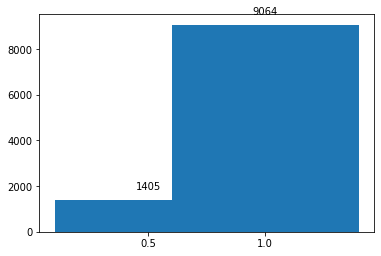

In [ ]:
x = labelwise_grp['orig_label'].index.tolist()
y = labelwise_grp['label'].tolist()
plt.bar(x,y)
labels = [0.5,1.0]
plt.xticks(x,labels )
for x,y in zip(x,y):
  label = "{:d}".format(y)
  
  plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center

plt.show()

### Percentage of agreement and disagreement between annotators

In [ ]:
disag, agree = labelwise_grp['label'].tolist()
print("Percentage of disagreement from annotators:%2f" %(100*(disag/(disag+agree))))
print("Percentage of agreement from annotators:%2f" %(100*(agree/(disag+agree))))

Percentage of disagreement from annotators:13.420575
Percentage of agreement from annotators:86.579425


### Group by country and label

In [ ]:
labelwise_grp = task1_df.groupby(['country', 'label']).count()
labelwise_grp

par_id  art_id  keyword  text  orig_label  probability
country label                                                        
au      0         504     504      504   504         504          504
        1          37      37       37    37          37           37
bd      0         468     468      468   468         468          468
        1          44      44       44    44          44           44
ca      0         484     484      484   484         484          484
        1          46      46       46    46          46           46
gb      0         483     483      483   483         483          483
        1          57      57       57    57          57           57
gh      0         448     448      448   448         448          448
        1          75      75       75    75          75           75
hk      0         461     461      461   461         461          461
        1          29      29       29    29          29           29
ie      0         485     485      485   485         485          485
        1          52      52       52    52          52           52
in      0         491     491      491   491         491          491
        1          39      39       39    39          39           39
jm      0         433     433      433   433         433          433
        1          57      57       57    57          57           57
ke      0         494     494      494   494         494          494
        1          45      45       45    45          45           45
lk      0         455     455      455   455         455          455
        1          49      49       49    49          49           49
my      0         503     503      503   503         503          503
        1          43      43       43    43          43           43
ng      0         465     465      465   465         465          465
        1          72      72       72    72          72           72
nz      0         471     471      471   471         471          471
        1          47      47       47    47          47           47
ph      0         478     478      478   478         478          478
        1          67      67       67    67          67           67
pk      0         492     492      492   492         492          492
        1          53      53       53    53          53           53
sg      0         497     497      497   497         497          497
        1          38      38       38    38          38           38
tz      0         374     374      374   374         374          374
        1          41      41       41    41          41           41
us      0         499     499      499   499         499          499
        1          44      44       44    44          44           44
za      0         491     491      491   491         491          491
        1          58      58       58    58          58           58

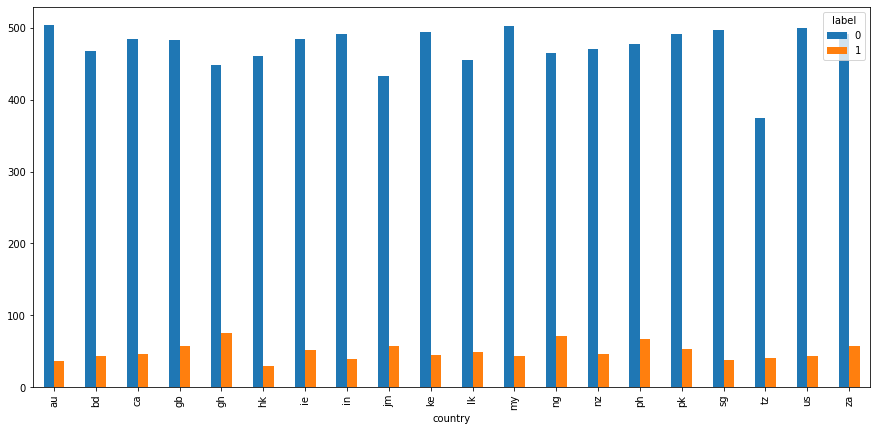

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
labelwise_grp['orig_label'].unstack().plot(ax=ax, kind='bar')

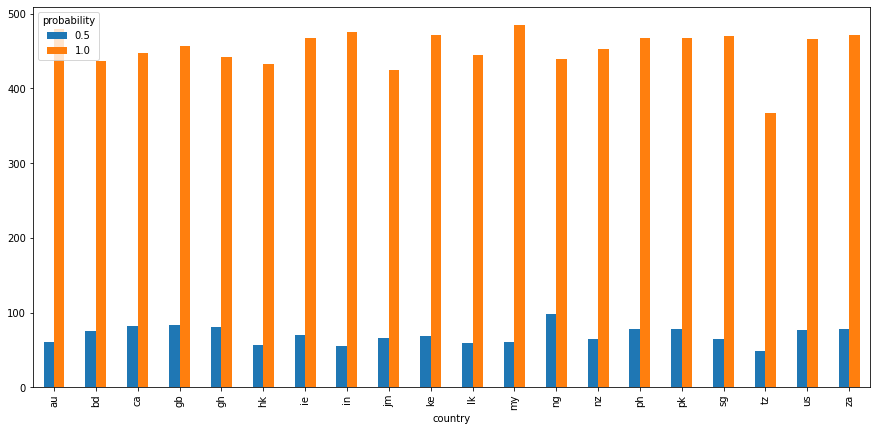

In [ ]:
labelwise_grps = task1_df[['country', 'label','probability']].groupby(['country','probability']).count()
fig, ax = plt.subplots(figsize=(15,7))
labelwise_grps['label'].unstack().plot(ax=ax, kind='bar')

In [ ]:
keywords = task1_df['keyword'].unique().tolist()
keywords

['hopeless',
 'migrant',
 'immigrant',
 'disabled',
 'refugee',
 'in-need',
 'homeless',
 'vulnerable',
 'women',
 'poor-families']

In [ ]:
indices = task1_df[task1_df['text'].str.contains(keywords[0])]['text'].index.tolist()

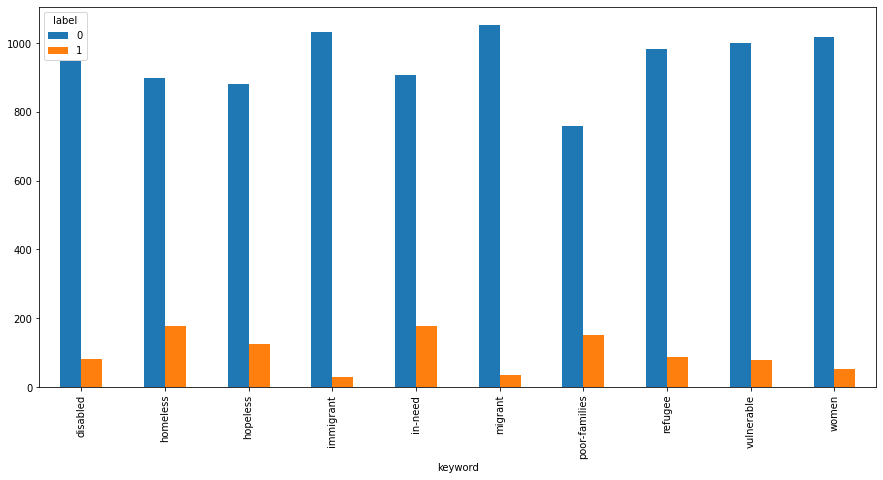

In [ ]:
labelwise_grps = task1_df[['country', 'label','keyword']].groupby(['keyword', 'label']).count()
fig, ax = plt.subplots(figsize=(15,7))
labelwise_grps['country'].unstack().plot(ax=ax, kind='bar')

In [ ]:
labelwise_grps.T

keyword disabled     homeless      hopeless  ... refugee vulnerable     women    
label          0   1        0    1        0  ...       1          0   1     0   1
country      947  81      899  178      881  ...      86       1000  80  1018  52

[1 rows x 20 columns]

### Fine tuning RoBERTa for Classification
[BERT reference using HuggingFace](https://towardsdatascience.com/fine-tuning-pretrained-nlp-models-with-huggingfaces-trainer-6326a4456e7b)

[HuggingFace tutorial for RoBERTa](https://huggingface.co/docs/transformers/master/en/model_doc/roberta#transformers.RobertaForSequenceClassification)

### Installation

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.3 MB 5.2 MB/s 
     |████████████████████████████████| 61 kB 465 kB/s 
     |████████████████████████████████| 895 kB 74.3 MB/s 
     |████████████████████████████████| 596 kB 79.3 MB/s 
     |████████████████████████████████| 3.3 MB 65.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install datasets

     |████████████████████████████████| 298 kB 5.2 MB/s 
     |████████████████████████████████| 243 kB 53.7 MB/s 
     |████████████████████████████████| 132 kB 79.3 MB/s 
     |████████████████████████████████| 1.1 MB 69.1 MB/s 
     |████████████████████████████████| 160 kB 76.5 MB/s 
     |████████████████████████████████| 192 kB 75.2 MB/s 
     |████████████████████████████████| 271 kB 74.8 MB/s 


In [ ]:
task1_df['text'][0]

"we 're living in times of absolute insanity , as i 'm pretty sure most people are aware . for a while , waking up every day to check the news seemed to carry with it the same feeling of panic and dread that action heroes probably face when they 're trying to decide whether to cut the blue or green wire on a ticking bomb -- except the bomb 's instructions long ago burned in a fire and imminent catastrophe seems the likeliest outcome . it 's hard to stay that on-edge for that long , though , so it 's natural for people to become inured to this constant chaos , to slump into a malaise of hopelessness and pessimism ."

### Fine tuning

In [ ]:
from transformers import RobertaConfig, RobertaModel,RobertaForSequenceClassification
configuration = RobertaConfig()
model = RobertaForSequenceClassification(configuration)
configuration = model.config
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained('roberta-base')
from datasets import Dataset
dataset = Dataset.from_pandas(task1_df)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [ ]:
dataset

Dataset({
    features: ['par_id', 'art_id', 'keyword', 'country', 'text', 'label', 'orig_label'],
    num_rows: 10469
})

In [ ]:
agreed_df = task1_df[task1_df['probability'] == 1]
disagreed_df = task1_df[task1_df['probability'] == 0.5]

In [ ]:
len(agreed_df), len(disagreed_df)

(9064, 1405)

In [ ]:
1405*2/10, 984+281

(281.0, 1265)

In [ ]:
dpm.load_task1()
dpm.test_path

'dontpatronizeme_pcl.tsv'

In [ ]:
train_df = agreed_df[:6345].append(disagreed_df[:984])[['text', 'label']]
test_df = agreed_df[6345:8158].append(disagreed_df[984:1265])[['text', 'label']]
valid_df = agreed_df[8158:].append(disagreed_df[1265:])[['text', 'label']]
#len(train_df.append(test_df))

In [ ]:
train_ds = Dataset.from_pandas(task1_df)
test_ds = Dataset.from_pandas(test_df)
valid_ds = Dataset.from_pandas(valid_df)
tokenized_train_ds = train_ds.map(lambda x: tokenizer(x["text"],max_length=256, padding="max_length", truncation=True, return_tensors="pt"))
tokenized_test_ds = test_ds.map(lambda x: tokenizer(x["text"],max_length=256, padding="max_length", truncation=True, return_tensors="pt"))
tokenized_valid_ds = valid_ds.map(lambda x: tokenizer(x["text"],max_length=256, padding="max_length", truncation=True, return_tensors="pt"))

  0%|          | 0/10469 [00:00<?, ?ex/s]

  0%|          | 0/2094 [00:00<?, ?ex/s]

  0%|          | 0/1046 [00:00<?, ?ex/s]

In [ ]:
# text = "we find ourselves in this situation because people are living longer and a number of more local factors including that the number of people requiring nursing care in their care home is increasing coupled with the increased demands for council-funded care to vulnerable people within their own homes ."

# tokenizer(text, max_length=256, padding='max_length', return_tensors="pt")

In [ ]:
len("we find ourselves in this situation because people are living longer and a number of more local factors including that the number of people requiring nursing care in their care home is increasing coupled with the increased demands for council-funded care to vulnerable people within their own homes .".split(" "))

49

In [ ]:
tokenized_train_ds = tokenized_train_ds.rename_column("label", "labels")
tokenized_test_ds = tokenized_test_ds.rename_column("label", "labels")
tokenized_valid_ds = tokenized_valid_ds.rename_column("label", "labels")
tokenized_train_ds.set_format("torch")
tokenized_test_ds.set_format("torch")
tokenized_valid_ds.set_format("torch")

In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

In [ ]:
small_train_dataset = tokenized_train_ds.shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_test_ds.shuffle(seed=42).select(range(1000))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
X_train = list(train_df["text"])
y_train = list(train_df["label"])
X_val = list(valid_df["text"])
y_val = list(valid_df["label"])
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [ ]:
from transformers import EarlyStoppingCallback
import random

random.seed(1)
# ----- 2. Fine-tune pretrained model -----#
# Define Trainer parameters
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}
model.zero_grad()
# Define Trainer
args = TrainingArguments(
    output_dir="output",
    evaluation_strategy="steps",
    eval_steps=500,
    learning_rate = 2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    seed=0,
    load_best_model_at_end=True,
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=10)],
)

In [ ]:
# Train pre-trained model
trainer.train()

***** Running training *****
  Num examples = 7329
  Num Epochs = 10
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2300


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.206800,0.255699,0.906310,0.526786,0.567308,0.546296
1000,0.089800,0.461223,0.912046,0.550847,0.625000,0.585586
1500,0.026700,0.564355,0.915870,0.580000,0.557692,0.568627
2000,0.008500,0.578284,0.924474,0.637363,0.557692,0.594872


***** Running Evaluation *****
  Num examples = 1046
  Batch size = 32
Saving model checkpoint to output/checkpoint-500
Configuration saved in output/checkpoint-500/config.json
Model weights saved in output/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1046
  Batch size = 32
Saving model checkpoint to output/checkpoint-1000
Configuration saved in output/checkpoint-1000/config.json
Model weights saved in output/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1046
  Batch size = 32
Saving model checkpoint to output/checkpoint-1500
Configuration saved in output/checkpoint-1500/config.json
Model weights saved in output/checkpoint-1500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1046
  Batch size = 32
Saving model checkpoint to output/checkpoint-2000
Configuration saved in output/checkpoint-2000/config.json
Model weights saved in output/checkpoint-2000/pytorch_model.bin


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.206800,0.255699,0.906310,0.526786,0.567308,0.546296
1000,0.089800,0.461223,0.912046,0.550847,0.625000,0.585586
1500,0.026700,0.564355,0.915870,0.580000,0.557692,0.568627
2000,0.008500,0.578284,0.924474,0.637363,0.557692,0.594872




Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from output/checkpoint-500 (score: 0.2556985020637512).


TrainOutput(global_step=2300, training_loss=0.07255633266075798, metrics={'train_runtime': 35549.7921, 'train_samples_per_second': 2.062, 'train_steps_per_second': 0.065, 'total_flos': 1.92834092473344e+16, 'train_loss': 0.07255633266075798, 'epoch': 10.0})

In [ ]:
import os
%cd /content/drive/MyDrive/ColabNotebooks/output/checkpoint-2000
os.path.exists("/content/drive/MyDrive/ColabNotebooks/output/checkpoint-2000")

/content/drive/MyDrive/ColabNotebooks/output/checkpoint-2000


True

In [ ]:
!mv /content/output /content/drive/MyDrive/Colab\ Notebooks

In [ ]:
dpm.load_test()

In [ ]:
# ----- 3. Predict -----#
# Load test data

X_test = list(test_df["text"])
X_test_tokenized = tokenizer(X_test, padding=True, truncation=True, max_length=512)

# Create torch dataset
test_dataset = Dataset(X_test_tokenized)

# Load trained model
model_path = "/content/drive/MyDrive/ColabNotebooks/output/checkpoint-2000"
model = RobertaForSequenceClassification.from_pretrained(model_path, num_labels=2)

# Define test trainer
test_trainer = Trainer(model)

# Make prediction
raw_pred, _, _ = test_trainer.predict(test_dataset)

# Preprocess raw predictions
y_pred = np.argmax(raw_pred, axis=1)

loading configuration file /content/drive/MyDrive/ColabNotebooks/output/checkpoint-2000/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.13.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading weights file /content/drive/MyDrive/ColabNotebooks/output/checkpoint-2000/pytorch_model.bin
All model checkpoint weights were use

In [ ]:
raw_pred

array([[ 4.7972746, -4.5505958],
       [-4.494454 ,  4.6093245],
       [ 5.0250854, -4.861603 ],
       ...,
       [ 1.7144836, -1.0891386],
       [ 4.2896724, -4.0312204],
       [ 4.604078 , -4.2238655]], dtype=float32)

In [ ]:
 pd.DataFrame(y_pred.tolist()).to_csv("/content/drive/MyDrive/ColabNotebooks/output/predictions.tsv", sep="\t", index=False)

In [ ]:
y_pred.tofile("/content/drive/MyDrive/ColabNotebooks/output/ypreds.csv")

In [ ]:
ypreds = [[y] for y in y_pred]
ypreds

[[0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0]

In [ ]:
%cd /content/

/content


In [ ]:
!mkdir ref res

In [ ]:
# helper function to save predictions to an output file
def labels2file(p, outf_path):
	with open(outf_path,'w') as outf:
		for pi in p:
			outf.write(','.join([str(k) for k in pi])+'\n')

In [ ]:
labels2file(test_df.label.apply(lambda x:[x]).tolist(), os.path.join('ref/', 'task1.txt'))

In [ ]:
labels2file(ypreds, os.path.join('res/', 'task1.txt'))

In [ ]:
%cd /content/

/content


In [ ]:
!cp scores.txt /content/drive/MyDrive/ColabNotebooks/output/

cp: cannot stat 'scores.txt': No such file or directory


In [ ]:
!python3 evaluation.py . .

In [ ]:
!cat scores.txt

task1_precision:0.5944055944055944
task1_recall:0.4748603351955307
task1_f1:0.5279503105590062


## Predicting the practice dev split

In [ ]:
len(tedf1.text.tolist())

2094

In [ ]:
# ----- 3. Predict -----#
# Load test data

X_test = list(tedf1["text"])
X_test_tokenized = tokenizer(X_test, padding=True, truncation=True, max_length=512)

# Create torch dataset
test_dataset = Dataset(X_test_tokenized)

# Load trained model
model_path = "/content/drive/MyDrive/ColabNotebooks/output/checkpoint-2000"
model = RobertaForSequenceClassification.from_pretrained(model_path, num_labels=2)

# Define test trainer
test_trainer = Trainer(model)

# Make prediction
raw_pred, _, _ = test_trainer.predict(test_dataset)

# Preprocess raw predictions
y_pred = np.argmax(raw_pred, axis=1)

loading configuration file /content/drive/MyDrive/ColabNotebooks/output/checkpoint-2000/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.13.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading weights file /content/drive/MyDrive/ColabNotebooks/output/checkpoint-2000/pytorch_model.bin
All model checkpoint weights were use

In [ ]:
# run predictions
preds_task1, _, _ = test_trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 2094
  Batch size = 8


In [ ]:
# Preprocess raw predictions
y_pred1 = np.argmax(preds_task1, axis=1)

In [ ]:
y_pred1, len(y_pred1)

(array([1, 1, 0, ..., 0, 0, 0]), 2094)

In [ ]:
 pd.DataFrame(y_pred1.tolist()).to_csv("/content/drive/MyDrive/ColabNotebooks/output/predictions_dev.tsv", sep="\t", index=False)

In [ ]:
y_pred1.tofile("/content/drive/MyDrive/ColabNotebooks/output/ypreds_dev.csv")

In [ ]:
ypreds1 = [[y] for y in y_pred1]
ypreds1

[[1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1]

In [ ]:
%cd /content/

/content


In [ ]:
!python3 evaluation.py . .

In [ ]:
!cat scores.txt

task1_precision:0.5944055944055944
task1_recall:0.4748603351955307
task1_f1:0.5279503105590062


In [ ]:
task2_df

,par_id,art_id,text,keyword,country,label
0,4046,@@14767805,we also know that they can benefit by receivin...,hopeless,us,"[1, 0, 0, 1, 0, 0, 0]"
1,1279,@@7896098,pope francis washed and kissed the feet of mus...,refugee,ng,"[0, 1, 0, 0, 0, 0, 0]"
2,8330,@@17252299,many refugees do n't want to be resettled anyw...,refugee,ng,"[0, 0, 1, 0, 0, 0, 0]"
3,4063,@@3002894,"""budding chefs , like """" fred """" , """" winston ...",in-need,ie,"[1, 0, 0, 1, 1, 1, 0]"
4,4089,@@25597822,"""in a 90-degree view of his constituency , one...",homeless,pk,"[1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...
988,873,@@20374243,citing the fact that these kids who died at go...,poor-families,sg,"[1, 0, 0, 0, 1, 0, 0]"
989,10070,@@15573661,fern ? ndez was a well-known philanthropist wh...,disabled,ng,"[1, 0, 0, 0, 0, 0, 0]"
990,6484,@@2559173,"touched much by their plight , commanding offi...",homeless,lk,"[1, 0, 0, 0, 0, 1, 0]"
991,6249,@@1947926,she reiterated her ministry 's commitment to p...,women,gh,"[1, 0, 0, 0, 0, 0, 0]"


In [ ]:
# tf_train_dataset = tokenized_train_ds.remove_columns(["text"])#.with_format("torch")
# tf_eval_dataset = tokenized_valid_ds.remove_columns(["text"])#.with_format("torch")

In [ ]:
# from torch.utils.data import DataLoader

# train_dataloader = DataLoader(tf_train_dataset, shuffle=True, batch_size=16)
# eval_dataloader = DataLoader(tf_eval_dataset, batch_size=16)

In [ ]:
# train_dataloader.dataset[0], train_dataloader.dataset[1]

In [ ]:
# from transformers import get_scheduler

# num_epochs = 3
# num_training_steps = num_epochs * len(train_dataset)
# lr_scheduler = get_scheduler(
#     "linear",
#     optimizer=optimizer,
#     num_warmup_steps=0,
#     num_training_steps=num_training_steps
# )

In [ ]:
# train_dataloader

In [ ]:
# import torch

# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# model.to(device)

In [ ]:
# from tqdm.auto import tqdm

# progress_bar = tqdm(range(num_training_steps))

# model.train()
# for epoch in range(num_epochs):
#     for batch in train_dataset:
#         print(batch.items())
#         batch = {k: v.to(device) for k, v in batch.items()}
#         outputs = model(**batch)
#         loss = outputs.loss
#         loss.backward()

#         optimizer.step()
#         lr_scheduler.step()
#         optimizer.zero_grad()
#         progress_bar.update(1)

In [ ]:
# from torchtext.legacy.data import Field, TabularDataset, BucketIterator, Iterator

# # Set tokenizer hyperparameters.
# MAX_SEQ_LEN = 256
# BATCH_SIZE = 16
# PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
# UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)


# # Define columns to read.
# label_field = Field(sequential=False, use_vocab=False, batch_first=True)
# text_field = Field(use_vocab=False, 
#                    tokenize=tokenizer.encode, 
#                    include_lengths=False, 
#                    batch_first=True,
#                    fix_length=MAX_SEQ_LEN, 
#                    pad_token=PAD_INDEX, 
#                    unk_token=UNK_INDEX)

In [ ]:
# train_iter, valid_iter = BucketIterator.splits((train_ds, valid_ds),
#                                                batch_size=BATCH_SIZE,
#                                                device=device,
#                                                shuffle=True,
#                                                sort_key=lambda x: len(x.text), 
#                                                sort=True, 
#                                                sort_within_batch=False)
# test_iter = Iterator(test_ds, batch_size=BATCH_SIZE, device=device, train=False, shuffle=False, sort=False)

# for (source, target), _ in train_iter:
#     mask = (source != PAD_INDEX).type(torch.uint8)

#     y_pred = model(input_ids=source,  
#                    attention_mask=mask)

In [ ]:
# # Model with classifier layers on top of RoBERTa
# class ROBERTAClassifier(torch.nn.Module):
#     def __init__(self, dropout_rate=0.3):
#         super(ROBERTAClassifier, self).__init__()
        
#         self.roberta = RobertaModel.from_pretrained('roberta-base')
#         self.d1 = torch.nn.Dropout(dropout_rate)
#         self.l1 = torch.nn.Linear(768, 64)
#         self.bn1 = torch.nn.LayerNorm(64)
#         self.d2 = torch.nn.Dropout(dropout_rate)
#         self.l2 = torch.nn.Linear(64, 2)
        
#     def forward(self, input_ids, attention_mask):
#         _, x = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
#         x = self.d1(x)
#         x = self.l1(x)
#         x = self.bn1(x)
#         x = torch.nn.Tanh()(x)
#         x = self.d2(x)
#         x = self.l2(x)
        
#         return x 

In [ ]:
# # Set tokenizer hyperparameters.
# MAX_SEQ_LEN = 256
# BATCH_SIZE = 16
# PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
# UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)


# # Define columns to read.
# label_field = Field(sequential=False, use_vocab=False, batch_first=True)
# text_field = Field(use_vocab=False, 
#                    tokenize=tokenizer.encode, 
#                    include_lengths=False, 
#                    batch_first=True,
#                    fix_length=MAX_SEQ_LEN, 
#                    pad_token=PAD_INDEX, 
#                    unk_token=UNK_INDEX)

# fields = {'text' : ('text', text_field), 'label' : ('label', label_field)}


# # Read preprocessed CSV into TabularDataset and split it into train, test and valid.
# train_data, valid_data, test_data = TabularDataset(path=f"{data_path}/prep_news.csv", 
#                                                    format='CSV', 
#                                                    fields=fields, 
#                                                    skip_header=False).split(split_ratio=[0.70, 0.2, 0.1], 
#                                                                             stratified=True, 
#                                                                             strata_field='label')

# # Create train and validation iterators.
# train_iter, valid_iter = BucketIterator.splits((train_data, valid_data),
#                                                batch_size=BATCH_SIZE,
#                                                device=device,
#                                                shuffle=True,
#                                                sort_key=lambda x: len(x.titletext), 
#                                                sort=True, 
#                                                sort_within_batch=False)

# # Test iterator, no shuffling or sorting required.
# test_iter = Iterator(test_data, batch_size=BATCH_SIZE, device=device, train=False, shuffle=False, sort=False)


In [ ]:
# # Create sentence and label lists
# sentences = train_df.text.values

# # We need to add special tokens at the beginning and end of each sentence for BERT to work properly
# sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
# labels = train_df.label.values
# tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
# print ("Tokenize the first sentence:")
# print (tokenized_texts[10])

In [ ]:
# import torch
# for text, label in tokenized_train_ds.get_index()

In [ ]:
# shuffled_dataset = dataset.shuffle()
# train_ds, test_ds = Dataset.from_pandas(task1_df, split=['train', 'test'])
# tokenized_dataset = dataset.map(lambda x: tokenizer(x["text"]))

In [ ]:
# train_ds, test_ds = Dataset.from_pandas(task1_df, split=['train', 'test'])

In [ ]:
# Same for subtask 2
dpm.load_task2()
# which we can then access as a dataframe
task2_df = dpm.train_task2_df.head()

In [ ]:
task2_df.head()